In [2]:
import numpy as np
import pandas as pd
from groq import Groq
import os
import time

In [3]:
response = pd.read_excel('../../dataframes/llama3-70B-OMIEC160824_RESPONSES.xlsx')
raw_data =  pd.read_excel('../../data/raw/OMIEC_16_08_24.xls')

In [4]:
raw_data['Abstract'][535]

'Neuromorphic computing has emerged as a highly promising alternative to conventional computing. The key to constructing a large-scale neural network in hardware for neuromorphic computing is to develop artificial neurons with leaky integrate-and-fire behavior and artificial synapses with synaptic plasticity using nanodevices. So far, these two basic computing elements have been built in separate devices using different materials and technologies, which poses a significant challenge to system design and manufacturing. In this work, we designed a resistive device embedded with an innovative nano-vacuum gap between a bottom electrode and a mixed-ionic-electronic-conductor (MIEC) layer. Through redox reaction on the MIEC surface, metallic filaments dynamically grew within the nano-vacuum gap. The nano-vacuum gap provided an additional control factor for controlling the evolution dynamics of metallic filaments by tuning the electron tunneling efficiency, in analogy to a pseudo-three-termin

In [5]:
result = pd.concat([response, raw_data], axis=1)
result.drop('index', axis=1, inplace=True)

In [6]:
def prepare_corpus(df):
    corpus = []
    for index, row in df.iterrows():
        for token in set(str(row['response']).replace('\n', ';').split(';')):
            corpus.append(token.strip().replace('/', "-").replace(":", "-"))
            
    return pd.Series(corpus)

In [7]:
corpus = prepare_corpus(result)
corpus = corpus[corpus != 'nan']
corpus = corpus[corpus != '']
corpus = corpus.reset_index(drop=True)

In [8]:
len(corpus)

200

In [9]:
np.unique(corpus[corpus.str.contains(r'PEDOT', regex=True)].values.tolist())

array(['EG-GOPS-PEDOT-PSS', 'PEDOT', 'PEDOT-PBA', 'PEDOT-PSS',
       'PEDOT-PolyDADMA Cl', 'PEDOT-PolyDADMA FSI',
       'PEDOT-PolyDADMA TFSI', 'PEDOT-PolyDADMA Tos', 'PEDOT-b-PEG',
       'PEO-PEDOT', 'PEO-PEDOT-KOTf', 'crys-PEDOT-PSS'], dtype='<U20')

In [10]:
"""replacements = {
    r'.*\s\(([^)]+)\)$': r'\1', # para polímeros que estão no formato 'nome_polímero (abreviação_polímero)', substitui pela abreviação apenas
    r'[Pp]oly\(3,4-ethylenedioxythiophene\)': 'PEDOT',
    r'\b[Pp]EDOT[-\s]?[Pp]oly\(?[0-9]*[-\s]*styrenesulfonate\)?\b': 'PEDOT-PSS',
    r'\b[Pp]EDOT\s*[-\s]*PSS\)?': 'PEDOT-PSS',
    r'\bPEDOT-PSS\)$': 'PEDOT-PSS',
    r'[Pp]olypyrrole': 'PPy',
    r'[Pp]olyethylenedioxythiophene': 'PEDOT',
    r'[Pp]olythiophene[s]?': 'PT',  
    r'[Pp]oly\((thiophene)\)': 'PT',
    r'[Pp]oly\(3-methylthiophene\)': 'P3MT',
    r'[Pp]oly\(3-hexylthiophene\)': 'P3HT',
    r'[Pp]oly\(3-hexylthiophene[-\d,]*diyl\)': 'P3HT'

}"""

items_to_remove = [r'(?i)\bmixed\b',
                   r'(?i)\bnone\b',
                   r'MIEC.*',
                   'based', 
                   r'[Pp]olymer',
                   r'OECT.*',
                   'conjug'
                   ]


In [11]:
'''for pattern, replacement in replacements.items():
    corpus = corpus.str.replace(pattern, replacement, regex=True, case=False)'''
    
for item in items_to_remove:
    corpus = corpus[~corpus.str.contains(item, regex=True)]

In [12]:
len(corpus)

191

In [13]:
len(corpus.unique())

131

In [14]:
corpus.value_counts().head(50)

PEDOT-PSS                                     25
PEO                                            8
P3HT                                           6
PEDOT                                          6
P3MEEET                                        4
PT                                             4
BBL                                            3
p(g2T-TT)                                      3
LSM                                            2
f-BTI2g-TVT                                    2
PProDOT                                        2
BSCF                                           2
LSCF                                           2
PPP                                            2
LSCF6428                                       2
P3MEEMT                                        2
PCO                                            2
Mel                                            1
ND                                             1
Pg2T-S                                         1
Pg2T-SVS            

C:\Users\thaynara220042\AppData\Local\Temp\ipykernel_33564\378995045.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_counts.values, y=top_10_counts.index, palette="viridis")


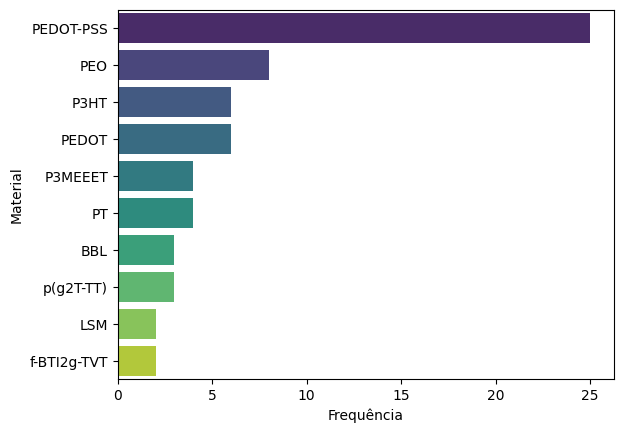

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

top_10_counts = corpus.value_counts().head(10)

# Plotando o histograma
sns.barplot(x=top_10_counts.values, y=top_10_counts.index, palette="viridis")
plt.xlabel('Frequência')
plt.ylabel('Material')
plt.show()

Tendência de publicações sobre a temática durante os anos

C:\Users\thaynara220042\AppData\Local\Temp\ipykernel_33564\1659120099.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


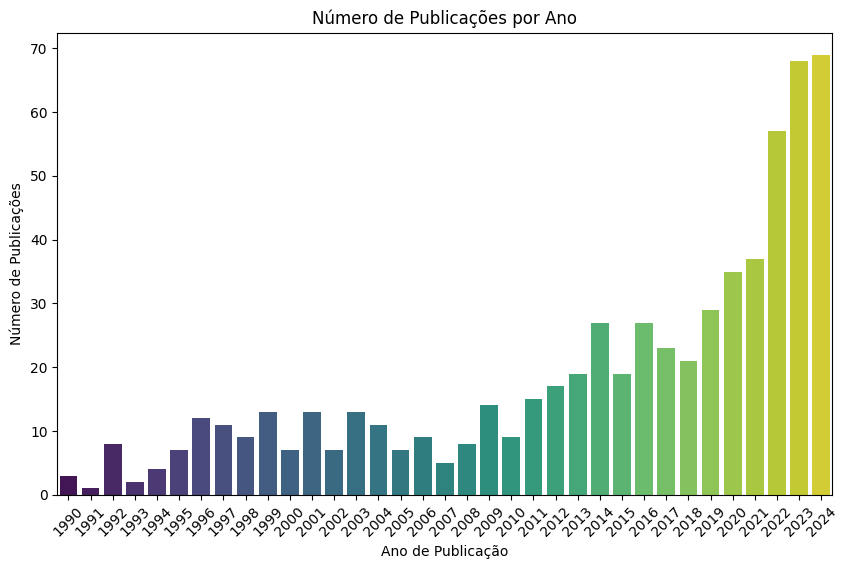

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'raw_data' seja o seu DataFrame e 'Publication Year' seja a coluna com os anos de publicação
publication_counts = raw_data['Publication Year'].value_counts()

# Ordenar os valores pela data para melhorar a visualização (opcional)
publication_counts = publication_counts.sort_index()

# Criar o gráfico de barras com Seaborn usando a paleta "viridis"
plt.figure(figsize=(10, 6))
sns.barplot(
    x=publication_counts.index, 
    y=publication_counts.values, 
    palette="viridis"  # Aplica a paleta de cores "viridis"
)

# Configurar o título e os rótulos dos eixos
plt.title('Número de Publicações por Ano')
plt.xlabel('Ano de Publicação')
plt.ylabel('Número de Publicações')

# Mostrar o gráfico
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()


Localizando os artigos em que aparecem os polímeros

In [18]:
polímeros_encontrados = pd.DataFrame(columns=['Nome'] + result.columns.tolist())

for index, row in result.iterrows():
    for token in set(str(row['response']).replace('\n', ';').split(';')):
            polimero = token.strip().replace('/', "-").replace(":", "-")
            new_row = row.to_dict() 
            new_row['Nome'] = polimero
            new_row_df = pd.DataFrame([new_row])
            polímeros_encontrados = pd.concat([new_row_df, polímeros_encontrados], ignore_index=True)

C:\Users\thaynara220042\AppData\Local\Temp\ipykernel_33564\4170896890.py:9: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [19]:
for index, row in polímeros_encontrados[polímeros_encontrados['Nome'] == 'PEDOT'].iterrows():
    print(row['Nome'],"| Citações:", row['Times Cited, All Databases'] , '\n', row['Abstract'], '\n')

PEDOT | Citações: 25 
 A wearable and transparent thermoelectric (TE) hydrogel based on bisulfate transport was demonstrated to record a negative ionic Seebeck coefficient of -25.0 mV K-1, ionic power factor of 9.94 mW m(-1) K-2, and an ionic figure of merit of 7.2 at 80% relative humidity and room temperature. The n-type TE hydrogel was made of electronic poly(3,4-ethylenedioxythiophene), ionic poly(2-acrylamido-2-methyl-1-propanesulfonic acid), and biocompatible bisulfate, which was used as a thermally diffusive anion carrier for the first time in TE devices, to realize a soft mixed ionic-electronic conductor. The composition of this hydrogel was precisely controlled by varying the contents of ammonium persulfate and 3,4-ethylenedioxythiophene to afford a transparent and self-healable film that recovered within 15 min after cutting (cut width of similar to 35 mu m). Bisulfate transport was visualized using an anion detective fluorophore as a tool to intuitively elucidate the Soret ef

### Playground

In [20]:
for index, row in result.iterrows():    
    if not isinstance(row['response'], float) and  'PEDOT' in row['response']:
        print(row['response'], '\n', row['Abstract'], '\n' )

Mel; PEDOT:PSS 
 Organic mixed ionic-electronic conductors (OMIECs) can efficiently couple and transport ionic and electronic charge species, making them key elements for bioelectronics, neuromorphic computing, soft robotics, and energy storage applications. Here, we have synthesized a water-soluble, bio-inspired ion conductor melanin (Mel) and blended it with benchmark conducting polymer poly(3,4-ethylenedioxythiophene) polystyrene sulfonate (PEDOT:PSS) to form a new OMIEC. We explored the potential of Mel/PEDOT:PSS OMIEC blends in two critical device applications: organic electrochemical transistors (OECTs) and supercapacitors (SuperCaps). Mel incorporation into PEDOT:PSS enhances the ionic-electronic coupling when ions from an electrolyte are injected into the material, increasing the volumetric capacitance of PEDOT:PSS films ten-fold. The addition of Mel in PEDOT:PSS also increases the transconductance of OECTs (from 7 +/- 1 to 11 +/- 3 mS), and the energy and power densities of Su

Tendência de publicações por ano plotado com plotly

In [17]:
import plotly.express as px

# Supondo que 'raw_data' seja o seu DataFrame e 'Publication Year' seja a coluna com os anos de publicação
publication_counts = raw_data['Publication Year'].value_counts()

# Ordenar os valores pela data para melhorar a visualização (opcional)
publication_counts = publication_counts.sort_index()

# Criar o gráfico de barras com Plotly
fig = px.bar(
    x=publication_counts.index, 
    y=publication_counts.values, 
    labels={'x': 'Publication Year', 'y': 'Number of Publications'},
    title='Number of Publications per Year',
    color=publication_counts.index,  # Adiciona cor baseado no índice (ano de publicação)
    color_continuous_scale='viridis'  # Aplica a paleta "viridis"
)

# Configurar o layout
fig.update_layout(
    xaxis=dict(tickangle=45),  # Rotaciona os rótulos do eixo x para melhor visualização
    yaxis_title='Number of Publications',
    xaxis_title='Publication Year',
    coloraxis_showscale=False  # Oculta a barra de escala de cores, se indesejado
)

# Mostrar o gráfico
fig.show()
